In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

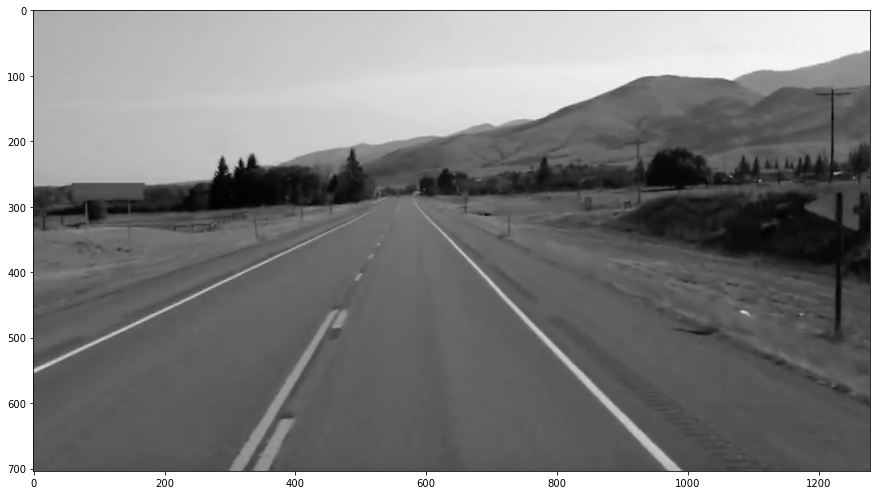

In [2]:
#Read the image in grayscale format
img = cv2.cvtColor(cv2.imread('test_image.jpg'), cv2.COLOR_BGR2GRAY)
figure = plt.figure(figsize = (15, 10))
plt.imshow(img, cmap = 'gray')

In [3]:
#Gaussian Blur
blurred = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)

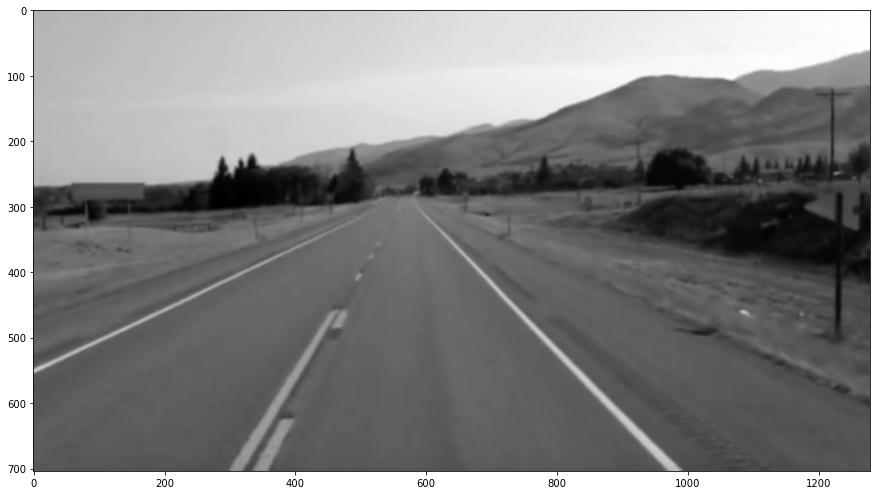

In [4]:
figure = plt.figure(figsize = (15, 10))
plt.imshow(blurred, cmap = 'gray')

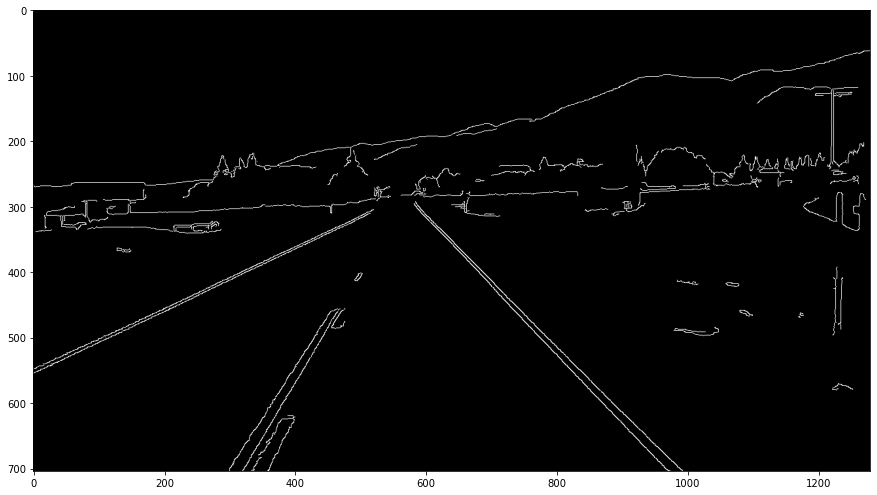

In [5]:
#Edge detection on the unblurred image
edo = cv2.Canny(img, 50, 150)
figure = plt.figure(figsize = (15, 10))
plt.imshow(edo, cmap = 'gray')

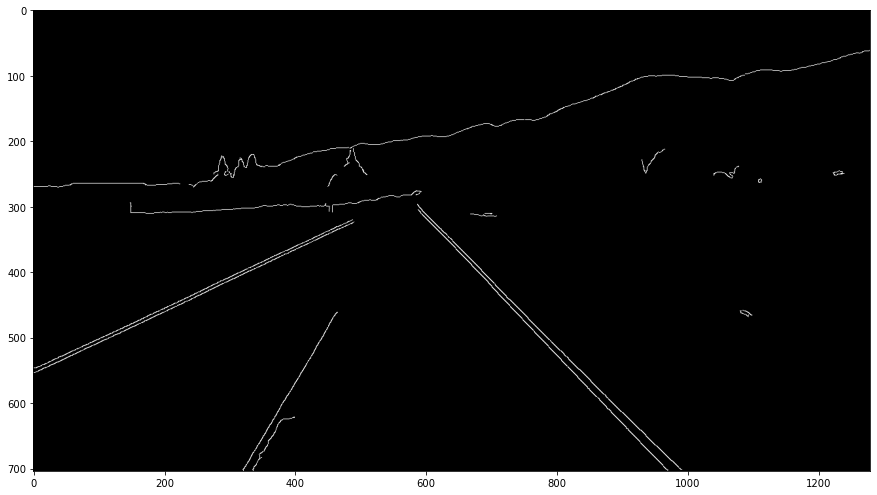

In [6]:
#Edge detection on the blurred image
edb = cv2.Canny(blurred, 50, 150)
figure = plt.figure(figsize = (15, 10))
plt.imshow(edb, cmap = 'gray')

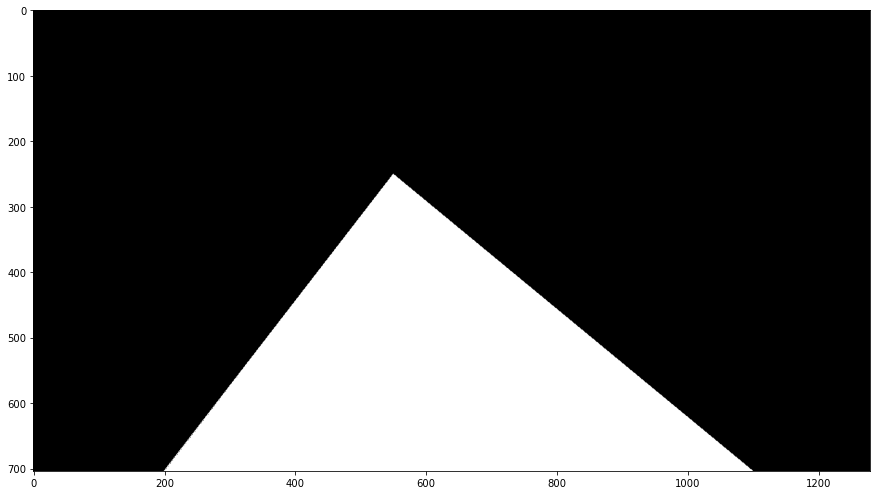

In [7]:
#Region of Interest
height = img.shape[0]
polygon = np.array([[(200, height), (1100, height), (550, 250)]])
mask = np.zeros_like(img)
cv2.fillPoly(mask, polygon, 255)
fig = plt.figure(figsize = (15, 10))
plt.imshow(mask, cmap = 'gray')

In [8]:
masked_img = cv2.bitwise_and(edb, mask)

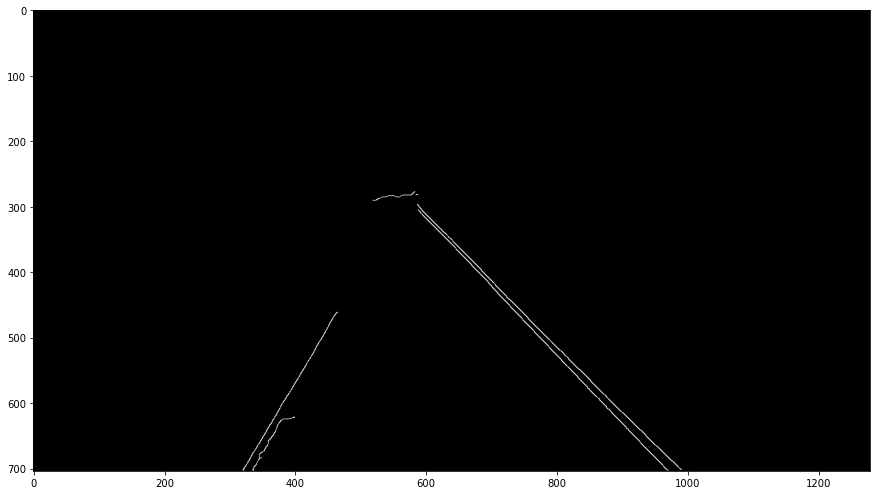

In [9]:
fig = plt.figure(figsize = (15, 10))
plt.imshow(masked_img, cmap = 'gray')

In [10]:
lines = cv2.HoughLinesP(masked_img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)

In [11]:
print(lines)

[[[710 433 832 559]]

 [[852 567 898 613]]

 [[901 614 975 688]]

 [[321 701 445 494]]

 [[871 600 940 673]]

 [[589 300 685 396]]

 [[756 471 818 531]]

 [[588 304 659 378]]

 [[806 520 927 641]]

 [[822 550 860 590]]

 [[692 404 734 448]]]


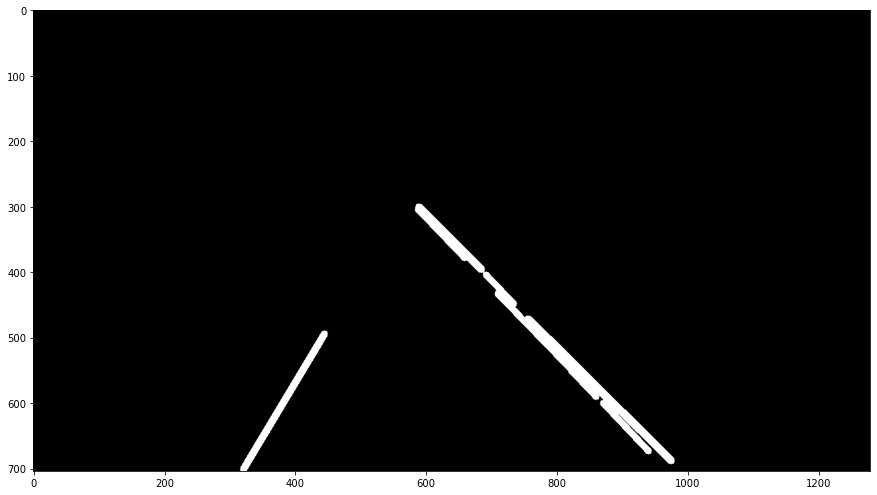

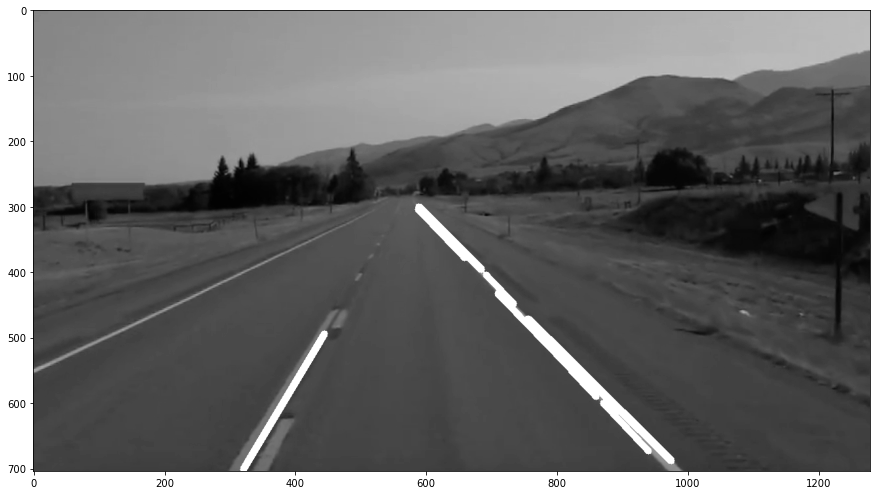

In [13]:
if lines is not None:
    lanes_img = np.zeros_like(img)
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        cv2.line(lanes_img, pt1 = (x1, y1), pt2 = (x2, y2), color = [255, 0, 0], thickness = 10)
plt.figure(figsize = (15, 10))        
plt.imshow(lanes_img, cmap = 'gray')

final_img = cv2.addWeighted(img, 0.8, lanes_img, 1, gamma = 0)
plt.figure(figsize = (15, 10))
plt.imshow(final_img, cmap = 'gray')